# Matrices

## 143. Example matrix creation

In [1]:
M = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
M

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

A numpy array/matrix is created by passing in a python array/matrix.
According to the numpy documentation, don't use the `np.matrix()`, but use regular numpy arrays to create a matrix:

> It is no longer recommended to use this class, even for linear algebra. Instead use regular arrays. The class may be removed in the future.

When passing in an array, both `(...)` and `[...]` are valid syntax.

In [2]:
import numpy as np
np.array(M)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
np.array(((1, 2, 3), (4, 5, 6)))

array([[1, 2, 3],
       [4, 5, 6]])

To create a matrix from columns, use one of the following:

In [4]:
columns = [[1, 4, 7], [2, 5, 8], [3, 6, 9]]
np.array([[1, 4, 7], [2, 5, 8], [3, 6, 9]]).transpose()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [5]:
np.column_stack([[1, 4, 7], [2, 5, 8], [3, 6, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## 145. Example matrix composition

Append columns: see above.
Append rows:

In [6]:
np.stack(([1, 2, 4], [5, 4, 3]))

array([[1, 2, 4],
       [5, 4, 3]])

To actually concatenate matrices, use `np.concatenate()` with the appropriate axis (0 for rows, 1 for columns).

In [7]:
A = np.array(M)
B = np.array(M).transpose()

np.concatenate((A, B), axis=0)  # concatenate rows (default)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [8]:
np.concatenate((A, B), axis=1)  # concatenate columns

array([[1, 2, 3, 1, 4, 7],
       [4, 5, 6, 2, 5, 8],
       [7, 8, 9, 3, 6, 9]])

## 148. Diagonal part remark

`np.diag(A)` behaves similar to MATLABs `diag(A)`:

In [9]:
A = np.random.random((3,3))
A

array([[0.71169382, 0.16368106, 0.24755917],
       [0.5137922 , 0.5798803 , 0.62360335],
       [0.17089954, 0.52363781, 0.41869508]])

In [10]:
np.diag(A)

array([0.71169382, 0.5798803 , 0.41869508])

## 160. Layout

Interesting read in the numpy documentation about [multidimensional array indexing order issues](https://numpy.org/doc/stable/reference/internals.html#multidimensional-array-indexing-order-issues).
The takeaway from this is that numpy offers both a row- and column-major order (row-major order denoted by C, column-major order denoted by F (for FORTRAN)).
The default is to use row-major order, watch out when going for a column-major approach (see the last paragraph).

Note: MATLAB uses column-major order (like FORTRAN). Thus the complexity table refers to the Python numpy column-major order.

In [14]:
A = np.array(M, order='C')

In [15]:
B = np.array(M, order='F')

## 166. Complexity

According to [this answer](https://stackoverflow.com/a/52208910/6629569) on SO (stack overflow) to the question if there exists a table of time complexity of numpy operations (as we have on the slides):

> BigO complexity is not often used with Python and numpy.
> It's a measure of how the code scales with problem size.
> That's useful in a compiled language like C.
> But here the code is a mix of interpreted Python and compiled code.
> Both can have the same bigO, but the interpreted version will be orders of magnitude slower.
> That's why most of the SO questions about improving numpy speed, talk about 'removing loops' and 'vectorizing'.

I suppose the table will be similar, but my guess is that it might not make much sense, other than that (obviously) operations on matrices are slower than operations on vectors.
There seems to be no significant difference between speed in column selection and row selection:

In [18]:
from timeit import repeat

for i in [1000, 10000]:
    n = int(i)
    print(min(repeat(
        "for j in range(len(A)): A[:,j]",
        setup=f"import numpy as np; A = np.random.randint(1, 9, ({n}, {n}))",
        repeat=3,
        number=100
    )))

0.018729271999973207
0.18228781100003744


In [20]:
for i in [1000, 10000]:
    n = int(i)
    print(min(repeat(
        "for j in range(len(B)): B[j,:]",
        setup=f"import numpy as np; B = np.random.randint(1, 9, ({n}, {n}))",
        repeat=3,
        number=100
    )))

0.018654706000006627
0.18862914600003933


## 159. Random numbers

In [21]:
np.array([])

array([], dtype=float64)

In [22]:
np.random.randint(1, 8, (8,8))

array([[6, 6, 1, 3, 6, 2, 1, 1],
       [1, 1, 5, 5, 3, 1, 1, 7],
       [3, 4, 1, 3, 5, 5, 5, 2],
       [4, 6, 3, 6, 4, 3, 3, 4],
       [2, 6, 4, 4, 2, 2, 1, 4],
       [5, 2, 6, 4, 1, 4, 4, 3],
       [3, 1, 6, 2, 3, 3, 3, 6],
       [5, 4, 3, 5, 4, 4, 3, 2]])

In [23]:
np.random.rand(8*8).reshape((8,8))

array([[0.45764892, 0.01596371, 0.43768702, 0.03080297, 0.57967638,
        0.31478103, 0.60930224, 0.68765955],
       [0.73147041, 0.54110168, 0.92752292, 0.3673118 , 0.97355051,
        0.8620122 , 0.67173983, 0.79422224],
       [0.38961624, 0.67202733, 0.58983842, 0.27396383, 0.70866229,
        0.5865223 , 0.75231253, 0.75124151],
       [0.74191611, 0.41274275, 0.95133227, 0.3988309 , 0.73536004,
        0.47631841, 0.01097888, 0.84469128],
       [0.97010637, 0.37638748, 0.91091484, 0.53770709, 0.05751691,
        0.74017068, 0.27023999, 0.10923205],
       [0.56992165, 0.78675951, 0.002028  , 0.57385803, 0.6791502 ,
        0.48162286, 0.8411864 , 0.51041573],
       [0.92780935, 0.04729101, 0.06150038, 0.77924747, 0.82069841,
        0.04132609, 0.86253867, 0.38113331],
       [0.39846692, 0.70887455, 0.19480623, 0.23204985, 0.15192304,
        0.10599748, 0.95848786, 0.52147968]])

In [24]:
np.random.random((8,8))

array([[0.08301154, 0.34723501, 0.40351129, 0.90763419, 0.17213234,
        0.61291368, 0.04454096, 0.50608997],
       [0.95935704, 0.56255313, 0.67209712, 0.83249478, 0.61537527,
        0.73521679, 0.65564831, 0.41767543],
       [0.44223714, 0.37755384, 0.23517513, 0.79199983, 0.76093577,
        0.91287696, 0.61001938, 0.45133945],
       [0.86810184, 0.55137194, 0.37634565, 0.8063799 , 0.61457813,
        0.96724817, 0.26658466, 0.1855013 ],
       [0.55094266, 0.09946192, 0.91029717, 0.26219546, 0.26135454,
        0.52077223, 0.80092531, 0.60387695],
       [0.57873942, 0.57058425, 0.53732949, 0.50503665, 0.34692412,
        0.27672246, 0.03493322, 0.01410724],
       [0.98010987, 0.21695881, 0.73367894, 0.01322263, 0.87546501,
        0.73988351, 0.44524573, 0.15062191],
       [0.46159342, 0.13064638, 0.66807754, 0.60441932, 0.39605348,
        0.50238504, 0.65243169, 0.61069863]])

In [25]:
np.random.poisson(0.7, (8,8))

array([[0, 1, 1, 0, 1, 4, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 2, 0, 1, 1, 0, 0],
       [2, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 2, 0, 0, 0, 1, 0],
       [1, 2, 0, 2, 0, 2, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 1]])

## 171. Visualization

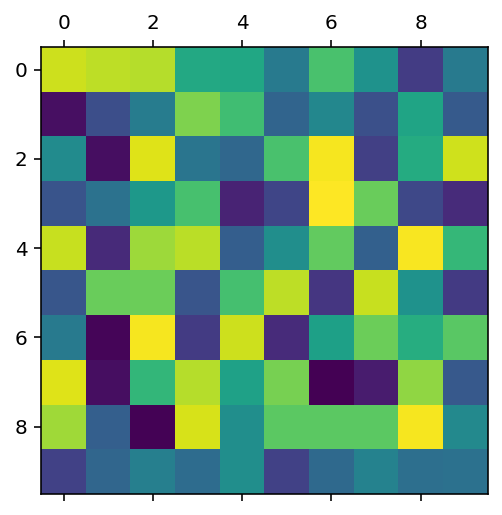

In [26]:
import matplotlib.pyplot as plt

n = 10
A = np.random.random((n,n))

plt.matshow(A)

## 172. Comparison (example)

In [27]:
A = np.zeros((3,3))
B = np.ones((3,3))
np.linalg.norm(A - B, np.inf)

3.0

## 173-174. Read/write (elements and columns)

In [28]:
A = np.random.randint(0, 9, (3,3))
A

array([[3, 5, 1],
       [1, 0, 5],
       [2, 7, 2]])

Read entry

In [29]:
A[1, 2]

5

Write entry

In [30]:
A[1, 2] = 0
A

array([[3, 5, 1],
       [1, 0, 0],
       [2, 7, 2]])

Read/write column

In [31]:
A[:, 1] = [0, 1, 2]
A

array([[3, 0, 1],
       [1, 1, 0],
       [2, 2, 2]])

Read/write row

In [32]:
A[1, :] = [11, 12, 13]
A

array([[ 3,  0,  1],
       [11, 12, 13],
       [ 2,  2,  2]])

## 175-176. Entry read/write blocks

In [33]:
A[[1,2]]

array([[11, 12, 13],
       [ 2,  2,  2]])

In [34]:
A[[1,2], :]

array([[11, 12, 13],
       [ 2,  2,  2]])

To obtain a submatrix, use slicing:

In [35]:
A[1:, 1:]

array([[12, 13],
       [ 2,  2]])

Note that the right index in a slice is exclusive:

In [36]:
B = np.random.randint(1, 9, (4,4))
B

array([[5, 2, 2, 6],
       [4, 2, 8, 2],
       [7, 3, 3, 5],
       [4, 3, 7, 3]])

In [37]:
B[1:3, 1:3]

array([[2, 8],
       [3, 3]])

## 177. Entry read/write: Efficiency

As mentioned above: no significant difference between row and column selection.
This claim might need some further research.
This also goes for the subsequent slides.
My current guess is that it does not make much of a difference, but maybe it does when doing some heavy work?

## 183. Logicals/Filters

In [38]:
A

array([[ 3,  0,  1],
       [11, 12, 13],
       [ 2,  2,  2]])

In [39]:
A[A > 4]

array([11, 12, 13])

## 184. Unique/Sorting

In [40]:
I = np.random.randint(1, 20, (20, 20))
I

array([[12,  8,  1,  6, 19,  4, 13,  2,  8, 11, 18,  3,  4, 19,  6,  8,
        19,  4,  7,  4],
       [18,  1, 17,  7,  5,  2,  8, 18,  8, 15, 11,  7,  3,  5, 18, 10,
        18,  9, 19, 19],
       [ 9,  7,  9,  6,  9, 12,  7,  7,  5,  6, 18, 17,  9, 13,  7,  8,
         5,  7, 14, 18],
       [18, 14,  6,  8,  1,  4, 11, 14, 12,  6, 10, 19, 15, 12, 11,  3,
        10, 14, 11, 10],
       [10, 10,  5, 19,  4,  7,  8,  8, 17,  9, 13,  2, 14,  7, 11, 15,
        19, 13, 17,  9],
       [18,  5,  3,  7,  6,  3, 19,  3,  9, 18,  2, 13, 13,  4, 17, 19,
        14,  6,  9,  1],
       [11,  5, 14, 19,  7,  3,  2, 14, 14,  3,  1,  6, 11, 16, 16, 15,
         2,  7,  8,  6],
       [ 7,  8, 11, 18,  4,  8,  7, 10,  7, 17, 19, 10,  5, 16, 18,  8,
         2,  8, 17,  5],
       [ 1, 13,  6, 10,  8, 19, 18, 11, 19, 17,  9, 18,  6, 13, 17, 13,
         6,  9, 11, 13],
       [ 9, 14,  8, 10, 19, 10, 11,  6,  1,  1,  2,  5, 12, 11, 17, 17,
         5, 10,  1,  7],
       [11, 10,  5,  7, 19,  1

`np.sort()` sorts each column (independently).

In [41]:
np.sort(I)

array([[ 1,  2,  3,  4,  4,  4,  4,  6,  6,  7,  8,  8,  8, 11, 12, 13,
        18, 19, 19, 19],
       [ 1,  2,  3,  5,  5,  7,  7,  8,  8,  9, 10, 11, 15, 17, 18, 18,
        18, 18, 19, 19],
       [ 5,  5,  6,  6,  7,  7,  7,  7,  7,  8,  9,  9,  9,  9, 12, 13,
        14, 17, 18, 18],
       [ 1,  3,  4,  6,  6,  8, 10, 10, 10, 11, 11, 11, 12, 12, 14, 14,
        14, 15, 18, 19],
       [ 2,  4,  5,  7,  7,  8,  8,  9,  9, 10, 10, 11, 13, 13, 14, 15,
        17, 17, 19, 19],
       [ 1,  2,  3,  3,  3,  4,  5,  6,  6,  7,  9,  9, 13, 13, 14, 17,
        18, 18, 19, 19],
       [ 1,  2,  2,  3,  3,  5,  6,  6,  7,  7,  8, 11, 11, 14, 14, 14,
        15, 16, 16, 19],
       [ 2,  4,  5,  5,  7,  7,  7,  8,  8,  8,  8, 10, 10, 11, 16, 17,
        17, 18, 18, 19],
       [ 1,  6,  6,  6,  8,  9,  9, 10, 11, 11, 13, 13, 13, 13, 17, 17,
        18, 18, 19, 19],
       [ 1,  1,  1,  2,  5,  5,  6,  7,  8,  9, 10, 10, 10, 11, 11, 12,
        14, 17, 17, 19],
       [ 1,  4,  5,  6,  7,  7

`np.unique()` lists the unique elements in a (multidimensional) array.

In [42]:
np.unique(I)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

## 186. Arithmetic

In [43]:
A = np.random.randint(1, 20, (4,4))
c = 3
A

array([[ 4, 13, 12,  1],
       [ 2, 15,  4,  1],
       [ 4, 12, 16,  3],
       [13, 10,  2,  2]])

In [44]:
c * A

array([[12, 39, 36,  3],
       [ 6, 45, 12,  3],
       [12, 36, 48,  9],
       [39, 30,  6,  6]])

In [45]:
A * c

array([[12, 39, 36,  3],
       [ 6, 45, 12,  3],
       [12, 36, 48,  9],
       [39, 30,  6,  6]])

Hadamard multiplication

In [46]:
A * A

array([[ 16, 169, 144,   1],
       [  4, 225,  16,   1],
       [ 16, 144, 256,   9],
       [169, 100,   4,   4]])

Matrix multiplication

In [47]:
A.dot(B)

array([[160,  73, 155, 113],
       [102,  49, 143,  65],
       [192,  89, 173, 137],
       [127,  58, 126, 114]])

In [48]:
np.dot(A, A)

array([[103, 401, 294,  55],
       [ 67, 309, 150,  31],
       [143, 454, 358,  70],
       [106, 363, 232,  33]])

In [49]:
A @ A

array([[103, 401, 294,  55],
       [ 67, 309, 150,  31],
       [143, 454, 358,  70],
       [106, 363, 232,  33]])

In [50]:
A.__matmul__(A)

array([[103, 401, 294,  55],
       [ 67, 309, 150,  31],
       [143, 454, 358,  70],
       [106, 363, 232,  33]])

Hadamard power

In [51]:
A ** 2

array([[ 16, 169, 144,   1],
       [  4, 225,  16,   1],
       [ 16, 144, 256,   9],
       [169, 100,   4,   4]])

In [52]:
np.linalg.matrix_power(A, 2)

array([[103, 401, 294,  55],
       [ 67, 309, 150,  31],
       [143, 454, 358,  70],
       [106, 363, 232,  33]])

## 187. Arithmetic

In [53]:
A = np.random.randint(1, 4, (4,4))
b = np.random.randint(1, 4, (4, 1))
print(A)
print(b)

[[3 1 1 3]
 [3 2 3 3]
 [1 1 3 3]
 [1 1 1 2]]
[[1]
 [2]
 [2]
 [3]]


Left division ($$Ax = b$$)

In [54]:
np.linalg.solve(A, b)

array([[-1.625],
       [ 3.25 ],
       [-1.125],
       [ 1.25 ]])

Left division by solving the least squares problem to minimize $$||Ax - b||_2$$
also returns solution for singular $A$.

In [55]:
# rcond=None to use future default for precision
np.linalg.lstsq(A, b, rcond=None)[0]

array([[-1.625],
       [ 3.25 ],
       [-1.125],
       [ 1.25 ]])

Numpy/Python does not have a right division like MATLAB does, instead, transpose both arguments and use left division:

In [56]:
B = np.random.randint(1, 4, (4, 4))
# rcond=None to use future default for precision
np.linalg.lstsq(B.T, A.T, rcond=None)[0].T

array([[-0.28571429, -0.42857143,  0.28571429,  1.71428571],
       [ 0.14285714,  0.71428571, -0.14285714,  1.14285714],
       [-1.42857143, -2.14285714,  3.42857143,  0.57142857],
       [-0.42857143, -1.14285714,  1.42857143,  0.57142857]])

# 189.  Tensors
Tensors in numpy are simply multi-dimensional arrays.

In [57]:
T = np.array([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])
T

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [58]:
T[1, 0, 1]

6

## 193. Visualization
Visualization uses lots of memory. If you use PyCharm and are limited to 4GB you may not have enough memory ...
To prevent this notebook from getting very slow, the visualization part is in the separate notebook: `week2_visualization`.

## 198. Block matrices
numpy has block matrix support, for example

In [59]:
np.block([
    [np.eye(3) * 3, np.zeros((3, 2))],
    [np.zeros((2, 3)), np.eye(2) * 2]
])

array([[3., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 2.]])

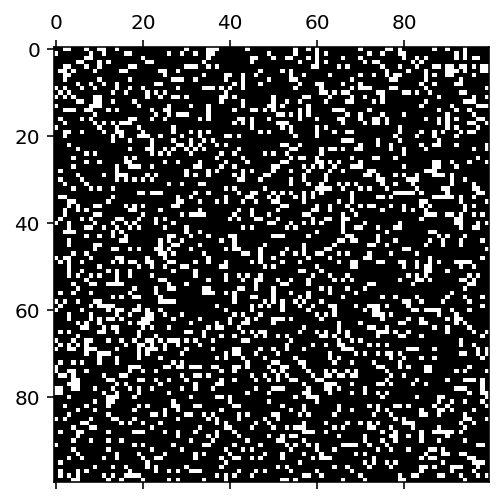

In [60]:
plt.spy(np.random.randint(0, 5, (100, 100)))
